https://www.kaggle.com/competitions/leopard-challenge-classification/overview

https://drive.google.com/file/d/1SwAFKEGBWZowTSf0ISf8wgRyqoJRhuEQ/view?usp=sharing

In [1]:
! gdown '1SwAFKEGBWZowTSf0ISf8wgRyqoJRhuEQ'

Downloading...
From: https://drive.google.com/uc?id=1SwAFKEGBWZowTSf0ISf8wgRyqoJRhuEQ
To: /content/smoke.csv.zip
100% 437k/437k [00:00<00:00, 41.8MB/s]


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [3]:
!unzip '/content/smoke.csv.zip'

Archive:  /content/smoke.csv.zip
  inflating: train.csv               


In [4]:
df = pd.read_csv('/content/smoke.csv.zip')
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,...,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,...,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,...,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,...,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,...,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


#Анализируем данный

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   13863 non-null  int64  
 1   age                  13863 non-null  int64  
 2   height(cm)           13863 non-null  int64  
 3   weight(kg)           13863 non-null  int64  
 4   waist(cm)            13863 non-null  float64
 5   eyesight(left)       13863 non-null  float64
 6   eyesight(right)      13863 non-null  float64
 7   hearing(left)        13863 non-null  float64
 8   hearing(right)       13863 non-null  float64
 9   systolic             13863 non-null  float64
 10  relaxation           13863 non-null  float64
 11  fasting blood sugar  13863 non-null  float64
 12  Cholesterol          13863 non-null  float64
 13  triglyceride         13863 non-null  float64
 14  HDL                  13863 non-null  float64
 15  LDL                  13863 non-null 

<Axes: xlabel='smoking', ylabel='Count'>

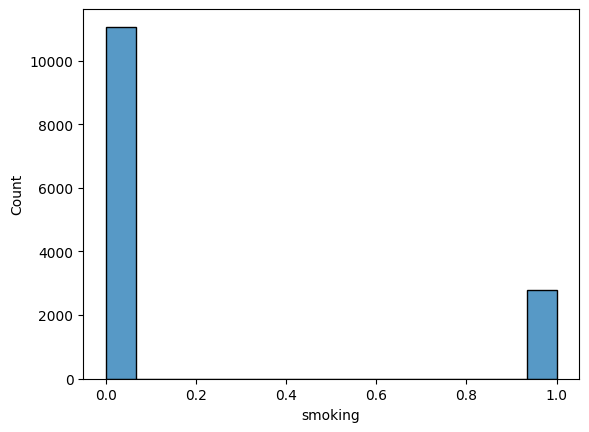

In [6]:
sns.histplot(df['smoking'])

In [7]:
df['smoking'].value_counts(normalize=True)

,proportion
smoking,
0,0.798024
1,0.201976


In [8]:
df.isna().sum()

,0
ID,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0


In [9]:
! pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.4 MB/s eta 0:00:00


In [10]:
import phik

In [11]:
phik.matrix = df.phik_matrix()

interval columns not set, guessing: ['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable oral for analysis 1. Dropping this column
  warnings.warn(


In [12]:
phik.matrix['smoking'].sort_values(ascending=False)

,smoking
smoking,1.000000
triglyceride,0.190446
age,0.183296
Gtp,0.142844
hemoglobin,0.112074
tartar,0.104470
dental caries,0.089124
waist(cm),0.062694
serum creatinine,0.055594
HDL,0.050773


#Подготовим данные

In [13]:
train, test = train_test_split(df, train_size=0.6, random_state=42, stratify=df['smoking'], shuffle=True)
test, val = train_test_split(test, train_size=0.5, random_state=42, stratify=test['smoking'], shuffle=True)

In [14]:
train.select_dtypes(include='object').columns

Index(['oral', 'tartar'], dtype='object')

In [15]:
train.columns

Index(['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'oral', 'dental caries', 'tartar', 'smoking'],
      dtype='object')

In [16]:
X = ['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'oral', 'dental caries', 'tartar']
y = ['smoking']


cat_features = ['oral', 'tartar']

#Запуск Кетбуста

In [17]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [18]:
from catboost import CatBoostClassifier,cv, Pool

In [19]:
train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                 )

valid_data = Pool(data=val[X].fillna('NaN'),
                  label=val[y],
                  cat_features=cat_features
                 )
test_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features
                 )

In [20]:
params = {'verbose':100,
          'random_seed': 42,
          'learning_rate':0.015}

In [21]:
model = CatBoostClassifier(**params)

In [22]:
model.fit(train_data, eval_set=valid_data)

0:	learn: 0.6864575	test: 0.6865957	best: 0.6865957 (0)	total: 57.9ms	remaining: 57.8s
100:	learn: 0.4814115	test: 0.4869677	best: 0.4869677 (100)	total: 1.66s	remaining: 14.7s
200:	learn: 0.4532130	test: 0.4681963	best: 0.4681963 (200)	total: 2.73s	remaining: 10.9s
300:	learn: 0.4376251	test: 0.4623738	best: 0.4623738 (300)	total: 4.19s	remaining: 9.73s
400:	learn: 0.4262999	test: 0.4600890	best: 0.4600890 (400)	total: 5.75s	remaining: 8.59s
500:	learn: 0.4163568	test: 0.4578896	best: 0.4578896 (500)	total: 7.17s	remaining: 7.14s
600:	learn: 0.4069255	test: 0.4567160	best: 0.4566955 (598)	total: 8.61s	remaining: 5.71s
700:	learn: 0.3976608	test: 0.4560448	best: 0.4560448 (700)	total: 9.68s	remaining: 4.13s
800:	learn: 0.3881093	test: 0.4552679	best: 0.4552679 (800)	total: 11s	remaining: 2.73s
900:	learn: 0.3792881	test: 0.4545424	best: 0.4545424 (900)	total: 13.5s	remaining: 1.48s
999:	learn: 0.3707686	test: 0.4543697	best: 0.4543387 (981)	total: 16.2s	remaining: 0us

bestTest = 0.454

In [23]:
test['y_pred_catboost'] = model.predict_proba(test_data)[:,1]

In [24]:
test['y_pred_catboost'].nunique()

2773

#Выбераем порог

In [25]:
thrs = [0]+list(test['y_pred_catboost'].unique())

In [26]:
from tqdm.notebook import tqdm

In [27]:
result = []
for thr in tqdm(thrs):
  test['thrs_pred_catboost'] = (test['y_pred_catboost'] > thr) *1
  result.append((thr,
                 f1_score(test[y],test['thrs_pred_catboost'])))

  0%|          | 0/2774 [00:00<?, ?it/s]

In [28]:
t = pd.DataFrame(result, columns=['thr', 'f1_score'])

In [29]:
t[t['f1_score'] == t['f1_score'].max()]

,thr,f1_score
1945,0.045805,0.337496


#Кросс валидаци

In [34]:
train_full = pd.concat([train, val])

In [41]:
params = {'cat_features': cat_features,
              'eval_metric': 'AUC',
          'loss_function': 'Logloss',
              'learning_rate': 0.02,
              'random_seed': 2007,
              'verbose':100}

In [37]:
data_pool = Pool(train_full[X], label=train_full[y], cat_features=cat_features)

In [39]:
cv_data = cv(
    params = params,
    pool = data_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False,
    early_stopping_rounds=200
)

Training on fold [0/5]

bestTest = 0.7110135174
bestIteration = 997

Training on fold [1/5]

bestTest = 0.7238567192
bestIteration = 965

Training on fold [2/5]

bestTest = 0.7093235339
bestIteration = 575

Training on fold [3/5]

bestTest = 0.7063735392
bestIteration = 994

Training on fold [4/5]

bestTest = 0.7139438058
bestIteration = 894



In [40]:
cv_data[cv_data['test-AUC-mean'] == cv_data['test-AUC-mean'].max()]

,iterations,test-AUC-mean,test-AUC-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
971,971,0.711876,0.00729,0.454461,0.014048,0.352646,0.008686


In [42]:
model2 = CatBoostClassifier(**params)

In [44]:
model2.fit(data_pool)

0:	total: 28.9ms	remaining: 28.9s
100:	total: 1.68s	remaining: 15s
200:	total: 3.17s	remaining: 12.6s
300:	total: 4.18s	remaining: 9.7s
400:	total: 4.91s	remaining: 7.34s
500:	total: 5.64s	remaining: 5.62s
600:	total: 6.34s	remaining: 4.21s
700:	total: 7.06s	remaining: 3.01s
800:	total: 7.78s	remaining: 1.93s
900:	total: 8.48s	remaining: 932ms
999:	total: 9.2s	remaining: 0us


In [48]:
test['model2_pred'] = model2.predict_proba(test[X])[:,1]

In [49]:
test

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,AST,ALT,Gtp,oral,dental caries,tartar,smoking,y_pred_catboost,thrs_pred_catboost,model2_pred
6025,18017,35,160,70,87.2,0.8,0.6,1.0,1.0,110.0,...,22.0,23.0,19.0,Y,1,Y,1,0.122070,0,0.194065
2693,18732,25,175,70,84.5,0.8,1.2,1.0,1.0,121.0,...,14.0,13.0,34.0,Y,0,N,0,0.281442,1,0.209774
7028,19561,45,180,80,84.0,0.9,0.9,1.0,2.0,125.0,...,20.0,20.0,18.0,Y,0,Y,1,0.099412,0,0.156955
3357,13482,60,155,55,83.0,0.6,0.8,1.0,1.0,115.0,...,27.0,38.0,33.0,Y,0,Y,0,0.276366,1,0.152714
1361,10195,40,180,75,87.0,1.0,1.0,1.0,1.0,110.0,...,24.0,23.0,34.0,Y,0,Y,0,0.291649,1,0.178676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11402,1837,40,175,85,93.0,1.2,1.0,1.0,1.0,126.0,...,23.0,43.0,58.0,Y,0,N,0,0.073157,0,0.247989
7451,15517,25,175,80,92.5,0.7,0.5,1.0,1.0,142.0,...,16.0,12.0,14.0,Y,0,Y,1,0.153937,0,0.042020
7311,9164,30,170,80,89.0,1.2,1.5,1.0,1.0,134.0,...,28.0,30.0,59.0,Y,0,Y,1,0.079807,0,0.411090
13466,7648,45,175,70,90.4,0.9,0.8,1.0,1.0,120.0,...,48.0,47.0,477.0,Y,1,Y,1,0.252634,1,0.613554


In [50]:
unique_y_scores = sorted(test['model2_pred'].unique())

In [51]:
f1_scores = []

for threshold in unique_y_scores:
    y_pred = (test['model2_pred'] >= threshold).astype(int)
    f1 = f1_score(test['smoking'], y_pred)
    f1_scores.append(f1)

results_df = pd.DataFrame({'threshold': unique_y_scores, 'f1': f1_scores})


In [52]:
max_f1_row = results_df.loc[results_df['f1'].idxmax()]

In [53]:
max_f1_row

,1965
threshold,0.245185
f1,0.453216
